<a href="https://colab.research.google.com/github/papchukev/demo/blob/main/%D0%9C%D0%B5%D1%82%D1%80%D0%B8%D0%BA%D0%B8%2B%D0%9A%D0%BE%D0%B3%D0%BE%D1%80%D1%82%D0%BD%D1%8B%D0%B9%2B%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Метрики. Когортный анализ

Имеются три датасета:
- `visits.csv` -- информация о посещениях сайта;
- `orders.csv` — информация о заказах;
- `costs.csv` — информация о расходах на маркетинг.

**Структура `visits.csv`**

|Имя поля| Описание поля|
|---:|:---|
|Uid | уникальный идентификатор пользователя|
|Device | категория устройства пользователя|
|Start Ts | дата и время начала сессии|
|End Ts | дата и время окончания сессии|
|Source Id | идентификатор источника перехода на сайт|

**Структура `orders.csv`**

|Имя поля| Описание поля|
|---:|:---|
|Uid | уникальный идентификатор пользователя|
|Buy Ts | дата и время заказа|
|Revenue | сумма заказа|

**Структура `costs.csv`**

|Имя поля| Описание поля|
|---:|:---|
|source_id | идентификатор рекламного источника|
|dt | дата проведения рекламной кампании|
|costs | расходы на эту кампанию|

Необходимо исследовать:
- как клиенты пользуются сайтом,
- когда делают первые покупки на сайте,
- сколько денег приносит компании каждый клиент,
- когда расходы на привлечение клиента окупаются.

Примерный план выполнения

**Шаг 1. Загрузить данные и подготовить их к анализу**

**Шаг 2. Рассчитать метрики и построить графики**

Посчитать метрики трёх видов:
- продуктовые,
- метрики электронной коммерции,
- маркетинговые.
Отобразить на графиках изменения каждой метрики во времени.

2.1. Продуктовые метрики
- 2.1.1. Рассчитать DAU, WAU и MAU. Вычислить средние значения этих метрик за весь период. Отобразить изменения метрик во времени на графиках;
- 2.1.2. Определить, сколько раз за день пользователи в среднем заходят на сайт. Построить график, отражающий изменения метрики во времени;
- 2.1.3. Исследовать, сколько времени пользователи проводят на сайте. Узнать продолжительность типичной пользовательской сессии за весь период;
- 2.1.4. Рассчитать Retention Rate, применяя когортный анализ. Показать изменения метрики во времени на графике. Найти средний Retention Rate на второй месяц «жизни» когорт.

2.2. Метрики электронной коммерции
- 2.2.1. Исследовать, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки;
- 2.2.2. Применяя когортный анализ, рассчитать среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев;
- 2.2.3. Рассчитать средний чек, применяя группировку по времени совершения покупки. Построить график, отражающий изменения метрики во времени;
- 2.2.4. Исследовать динамику LTV на покупателя по когортам. Рассчитать средний LTV по когортам за 6 месяцев. Отразить изменения метрики во времени на графике;

2.3. Маркетинговые метрики

Посчитать и отобразить на графиках, как маркетинговые метрики различаются по рекламным источникам:

- 2.3.1. Посчитать общую сумму расходов на маркетинг. Выяснить, как траты распределены по источникам. Визуализировать изменения метрик во времени;
- 2.3.2. Рассчитать средний CAC на одного покупателя для всего проекта и для каждого источника трафика. Отразить изменения метрик на графиках;
- 2.3.3. Рассчитать ROI по когортам в разрезе источников. Сравнить окупаемость за одинаковые периоды жизни когорт. Построить графики, отражающие изменения метрик во времени.

**Шаг 3. Анализ источников траффика**
- 3.1. Определить основные источники трафика;
- 3.2. Определить самые перспективные когорты клиентов.

# Загрузка данных

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

In [ ]:
dict_from_file = {"Информация о посещениях сайта" : "visits.csv",
                  "Информация о заказах" : "orders.csv",
                  "Информация о расходах на маркетинг" : "costs.csv"
                  }

In [ ]:
lst_df = list()
for info, path in dict_from_file.items():
    lst_df.append(pd.read_csv(path))
    print(f"--- Файл с {info} прочитан ----")
    display(pd.read_csv(path).head(2))
    print()


--- Файл с Информация о посещениях сайта прочитан ----


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740



--- Файл с Информация о заказах прочитан ----


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447



--- Файл с Информация о расходах на маркетинг прочитан ----


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25


In [ ]:
col_to_astype = ['end_ts', 'start_ts', 'buy_ts', 'dt']
for df in lst_df:
    print(f"----------")
    df.columns = df.columns.str.lower() # приведение признаков к нижнему регистру
    df.columns = ['_'.join(col.split()) for col in list(df.columns)] # убираем пробелы
    if 'uid' in df.columns: # переименовали uid ->  user_id
        df.rename(columns = {'uid' : 'user_id'},
                  inplace = True)
    for col in col_to_astype: # преобразование типов данных
        if col in df.columns:
             df[col] = pd.to_datetime(df[col])
    display(df.head(2))
    print(f"----------")

----------


,device,end_ts,source_id,start_ts,user_id
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740


----------
----------


,buy_ts,revenue,user_id
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447


----------
----------


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25


----------


In [ ]:
df_visits = lst_df[0]
df_orders = lst_df[1]
df_costs = lst_df[2]

In [ ]:
df_costs = pd.read_csv('/content/costs.csv')
df_orders = pd.read_csv('/content/orders.csv')
df_visits = pd.read_csv('/content/visits.csv')

In [ ]:
# затраты на маркетинг

display(df_costs.head(5))
df_costs.info()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [ ]:
# посещения
display(df_visits.head())
df_visits.info()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [ ]:
# покупки
df_orders.head()
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


# Предобработка

In [ ]:
df_orders.columns = df_orders.columns.str.lower()
df_orders.rename(columns = {'buy ts' : 'buy_ts',
                   'uid' : 'user_id'},
                  inplace = True)
df_orders

df_visits.columns = df_visits.columns.str.lower()
df_visits.rename(columns = {'end ts' : 'end_ts',
                            'source id' : 'source_id',
                            'start ts' : 'start_ts',
                            'uid' : 'user_id'},
                  inplace = True)
df_visits

,device,end_ts,source_id,start_ts,user_id
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [ ]:
#конвертация типов
df_orders = df_orders.astype({'buy_ts' : 'datetime64'})

In [ ]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   user_id  50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [ ]:
df_visits = df_visits.astype({'start_ts' : 'datetime64',
                              'end_ts' : 'datetime64'})

In [ ]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   user_id    359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [ ]:
df_costs = df_costs.astype({'dt' : 'datetime64'})

In [ ]:
df_costs.head(2)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25


In [ ]:
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [ ]:
display(df_costs.head(2))
display(df_visits.head(2))
display(df_orders.head(2))



,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25


,device,end_ts,source_id,start_ts,user_id
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740


,buy_ts,revenue,user_id
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447


In [ ]:
df_costs.dt.agg(['min', 'max'])

min   2017-06-01
max   2018-05-31
Name: dt, dtype: datetime64[ns]

In [ ]:
df_visits.end_ts.agg(['min', 'max'])

min   2017-06-01 00:02:00
max   2018-06-01 01:26:00
Name: end_ts, dtype: datetime64[ns]

Видим, что данные о посещениях еще собирались 1.5 часа. Следует удалить эти данные

In [ ]:
df_orders.buy_ts.agg(['min', 'max'])

min   2017-06-01 00:10:00
max   2018-06-01 00:02:00
Name: buy_ts, dtype: datetime64[ns]

In [ ]:
#Найдем клиентов, завершивших сессий после окончания периода исследования

df_visits.end_ts.agg(['min', 'max'])

min   2017-06-01 00:02:00
max   2018-06-01 01:26:00
Name: end_ts, dtype: datetime64[ns]

In [ ]:
date_end = dt.datetime(2018,6,1,0,0,0)

In [ ]:
df_visits.loc[~(df_visits.end_ts < date_end)]

,device,end_ts,source_id,start_ts,user_id
2330,desktop,2018-06-01 00:05:00,2,2018-05-31 23:30:00,5300693976971713685
43215,desktop,2018-06-01 00:13:00,4,2018-05-31 23:46:00,12296626599487328624
46667,desktop,2018-06-01 00:13:00,5,2018-05-31 23:48:00,1107134732939577311
154728,desktop,2018-06-01 00:09:00,2,2018-05-31 22:52:00,12484396335714047199
198329,desktop,2018-06-01 00:11:00,3,2018-05-31 23:59:00,3720373600909378583
216791,touch,2018-06-01 00:06:00,5,2018-05-31 23:45:00,9951896961656595558
263781,desktop,2018-06-01 00:25:00,1,2018-05-31 23:59:00,4906562732540547408
269213,touch,2018-06-01 00:12:00,10,2018-05-31 23:59:00,10723414689244282024
288563,touch,2018-06-01 00:01:00,4,2018-05-31 23:37:00,1094281763368510391
299620,desktop,2018-06-01 00:04:00,4,2018-05-31 23:59:00,83872787173869366


Итак, мы убедились, что предоставлены данные о посещения и покупках за необходимый период.

# 2.1. Продуктовые метрики

2.1.1. Рассчитать DAU, WAU и MAU. Вычислить средние значения этих метрик за весь период. Отобразить изменения метрик во времени на графиках;

2.1.2. Определить, сколько раз за день пользователи в среднем заходят на сайт. Построить график, отражающий изменения метрики во времени;

2.1.3. Исследовать, сколько времени пользователи проводят на сайте. Узнать продолжительность типичной пользовательской сессии за весь период;

2.1.4. Рассчитать Retention Rate, применяя когортный анализ. Показать изменения метрики во времени на графике. Найти средний Retention Rate на второй месяц «жизни» когорт.

In [ ]:
#Введем такие признаки как день -- дату, неделю, месяц и год
df_visits['day_visits'] = df_visits['start_ts'].dt.date
df_visits['week_visits'] = df_visits['start_ts'].dt.week
df_visits['month_visits'] = df_visits['start_ts'].dt.month#strftime("%Y-%m")
df_visits['year_visits'] = df_visits['start_ts'].dt.year



<ipython-input-220-47e417546d62>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_visits['week_visits'] = df_visits['start_ts'].dt.week


In [ ]:
#проверка дат
df_visits[['start_ts', 'day_visits', 'week_visits', 'month_visits', 'year_visits']]

,start_ts,day_visits,week_visits,month_visits,year_visits
0,2017-12-20 17:20:00,2017-12-20,51,12,2017
1,2018-02-19 16:53:00,2018-02-19,8,2,2018
2,2017-07-01 01:54:00,2017-07-01,26,7,2017
3,2018-05-20 10:59:00,2018-05-20,20,5,2018
4,2017-12-27 14:06:00,2017-12-27,52,12,2017
...,...,...,...,...,...
359395,2017-07-29 19:07:00,2017-07-29,30,7,2017
359396,2018-01-25 17:38:00,2018-01-25,4,1,2018
359397,2018-03-03 10:12:00,2018-03-03,9,3,2018
359398,2017-11-02 10:12:00,2017-11-02,44,11,2017


In [ ]:
#считаем количество уникальных клиентов на каждый день -- метрика dau

dau = df_visits.groupby('day_visits').agg(count_all_user_one_day = ('user_id', 'count'),
                                          count_unique_user_one_day = ('user_id', 'nunique'))
dau.head(5)

,count_all_user_one_day,count_unique_user_one_day
day_visits,,
2017-06-01,664,605
2017-06-02,658,608
2017-06-03,477,445
2017-06-04,510,476
2017-06-05,893,820


In [ ]:
wau = df_visits.groupby(['year_visits','week_visits']).agg(count_all_user_one_week = ('user_id', 'count'),
                                          count_unique_user_one_week = ('user_id', 'nunique'))
wau

count_all_user_one_week  count_unique_user_one_week
year_visits week_visits                                                     
2017        22                              2309                        2021
            23                              4931                        4129
            24                              3214                        2812
            25                              3273                        2878
            26                              3514                        3064
            27                              3822                        3294
            28                              5105                        4355
            29                              4574                        3841
            30                              3072                        2655
            31                              2729                        2364
            32                              2782                        2444
            33                              3128                        2746
            34                              3585                        3116
            35                              4296                        3694
            36                              5115                        4412
            37                              5011                        4319
            38                              5715                        4874
            39                              7315                        6241
            40                              8878                        7612
            41                              8317                        7074
            42                              8336                        7148
            43                              8712                        7401
            44                              8645                        7480
            45                              8287                        7179
            46                              9656                        8117
            47                             13572                       10586
            48                             10409                        8166
            49                             10298                        8407
            50                             10120                        8214
            51                              8500                        7172
            52                              9230                        7774
2018        1                               8057                        6918
            2                               7871                        6703
            3                               8317                        6972
            4                               8488                        7060
            5                               9796                        8111
            6                               9407                        7908
            7                               9272                        7759
            8                               8930                        7518
            9                               8771                        7395
            10                              8147                        6844
            11                              7489                        6225
            12                              9393                        7898
            13                              5862                        4940
            14                              6242                        5383
            15                              6382                        5494
            16                              6768                        5740
            17                              6574                        5503
            18                              4496                        3916
            19                              4803                        4128
            20       

In [ ]:
mau = df_visits.groupby(['year_visits','month_visits']).\
agg(count_all_user_one_month = ('user_id', 'count'),
    count_unique_user_one_month = ('user_id', 'nunique'))
mau

count_all_user_one_month  \
year_visits month_visits                             
2017        6                                16505   
            7                                17828   
            8                                14355   
            9                                23907   
            10                               37903   
            11                               43969   
            12                               41983   
2018        1                                36939   
            2                                37182   
            3                                35679   
            4                                26515   
            5                                26635   

                          count_unique_user_one_month  
year_visits month_visits                               
2017        6                                   13259  
            7                                   14183  
            8                                   11631  
            9                                   18975  
            10                                  29692  
            11                                  32797  
            12                                  31557  
2018        1                                   28716  
            2                                   28749  
            3                                   27473  
            4                                   21008  
            5                                   20701

In [ ]:
#вычислить средние значения этих метрик за весь период
print('''Средние:
 DAU : {},
 WAU : {},
 MAU : {}'''.format(dau.count_unique_user_one_day.mean(),
                wau.count_unique_user_one_week.mean(),
                mau.count_unique_user_one_month.mean()))

Средние: 
 DAU : 907.9917582417582,
 WAU : 5716.245283018868,
 MAU : 23228.416666666668


In [ ]:
#показатели вовлеченности (за неделю, за месяц)
print(dau.count_unique_user_one_day.mean()/wau.count_unique_user_one_week.mean()*100)
print(dau.count_unique_user_one_day.mean()/mau.count_unique_user_one_month.mean()*100)


15.88440861589881
3.908969652437603


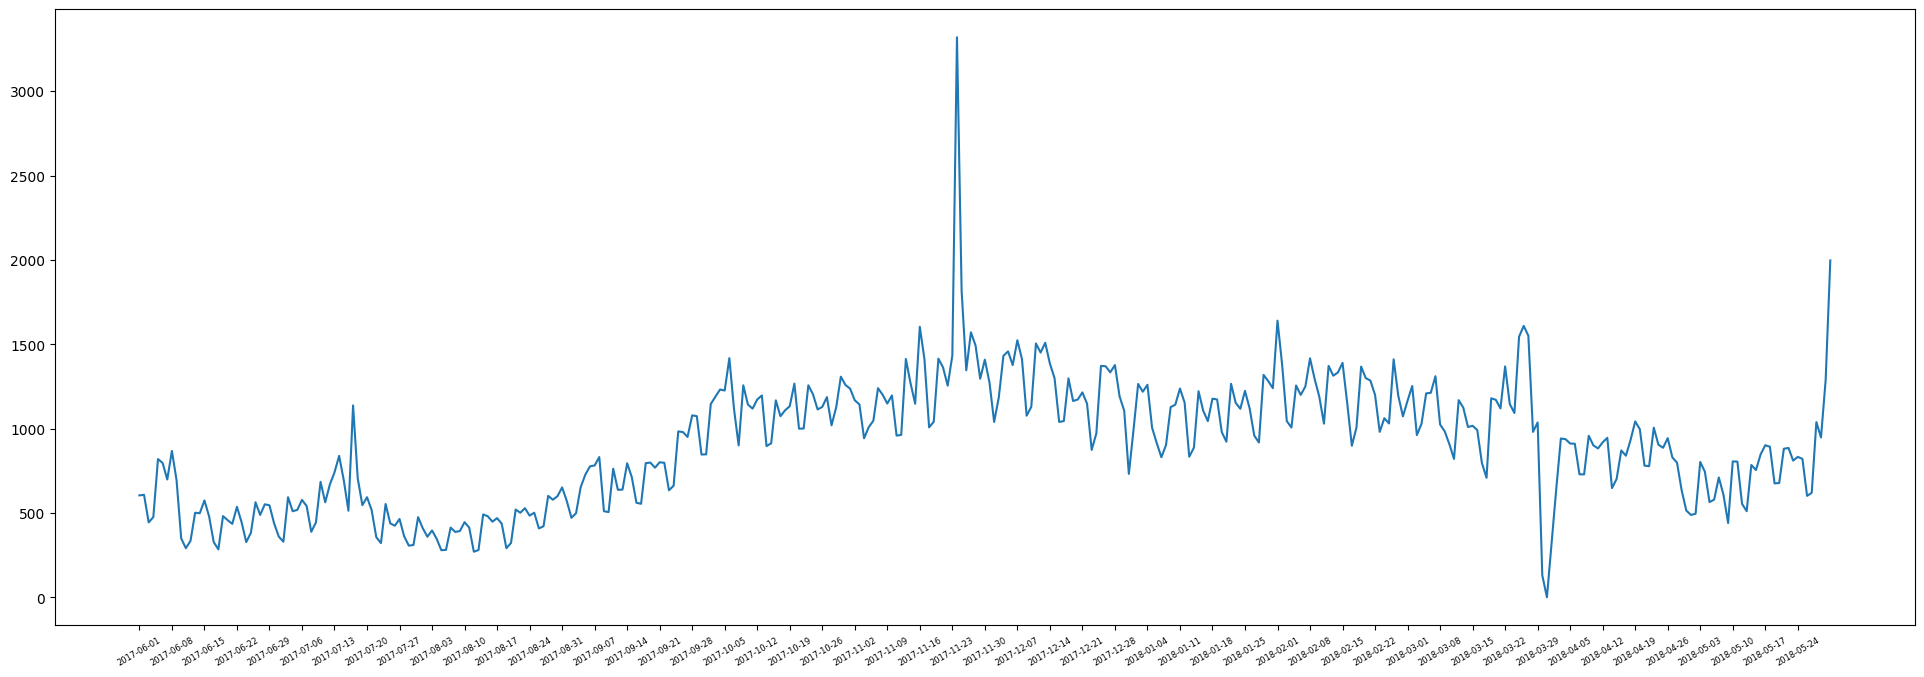

In [ ]:
#график 'DAU'

fig, ax = plt.subplots(figsize = (24, 8))
ax = sns.lineplot(data = dau.reset_index(),
             x = 'day_visits',
             y = 'count_unique_user_one_day');
plt.xlabel('')
plt.ylabel('')
plt.xticks(np.arange(dau.index.min(), dau.index.max(), pd.to_timedelta('7 day')),
           rotation = 30, fontsize = 6);

In [ ]:
wau['week'] = ["%s-%02d" % item for item in wau.index.tolist()]
wau.head(2)

count_all_user_one_week  count_unique_user_one_week  \
year_visits week_visits                                                        
2017        22                              2309                        2021   
            23                              4931                        4129   

                            week  
year_visits week_visits           
2017        22           2017-22  
            23           2017-23

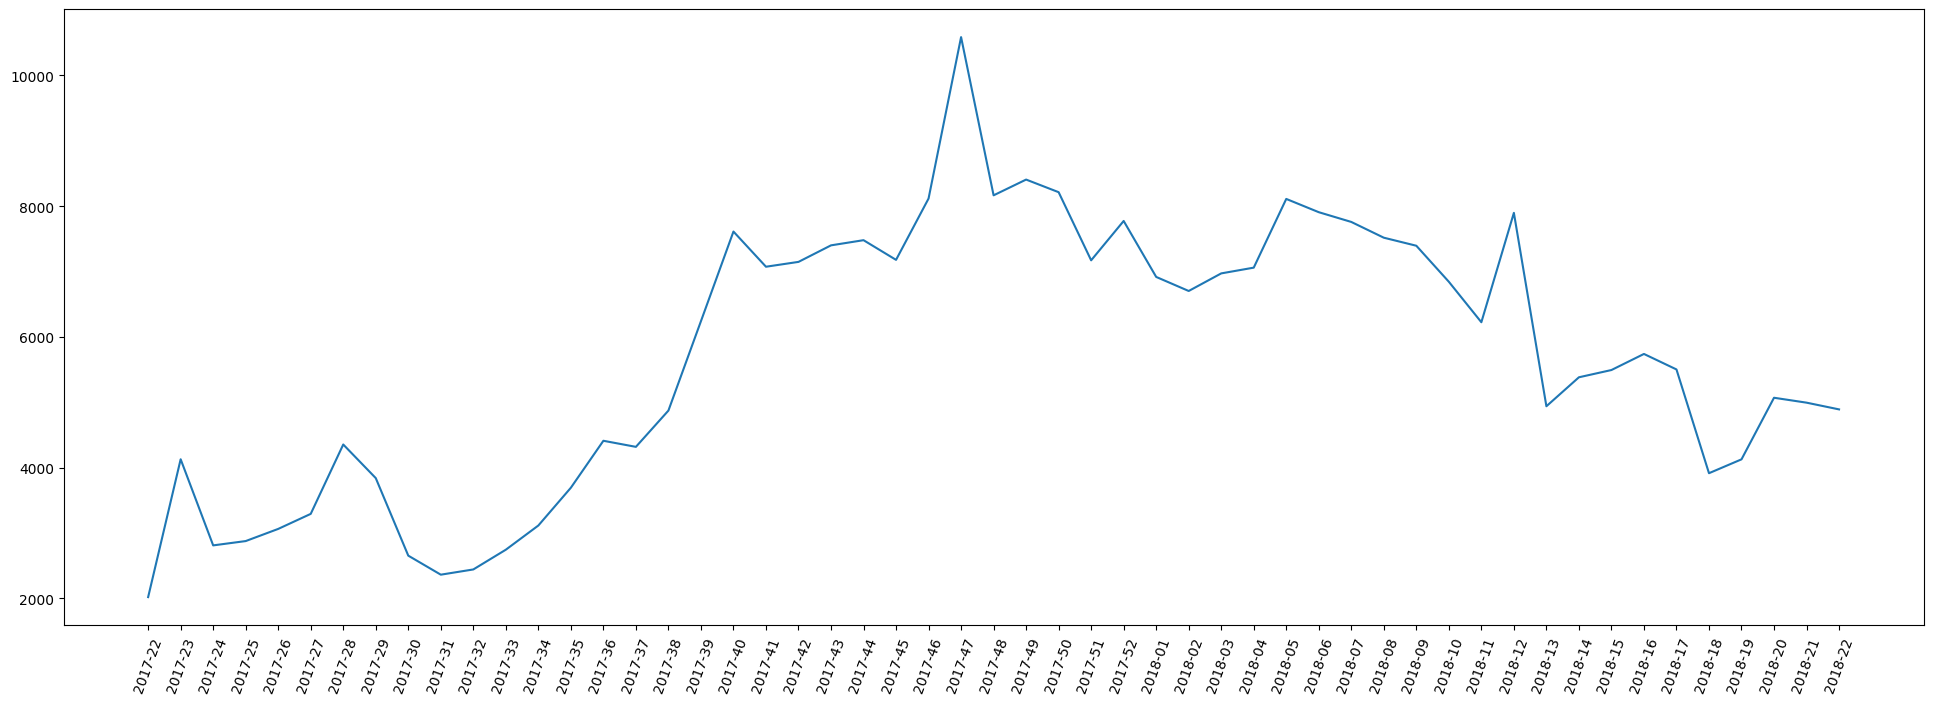

In [ ]:
#график 'WAU'
fig, ax = plt.subplots(figsize = (24, 8))
ax = sns.lineplot(data = wau,
                  x = 'week',
                  y = 'count_unique_user_one_week')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = 70);

In [ ]:
mau['month'] = ["%s-%02d" % item for item in mau.index.tolist()]
mau.head(3)

count_all_user_one_month  \
year_visits month_visits                             
2017        6                                16505   
            7                                17828   
            8                                14355   

                          count_unique_user_one_month    month  
year_visits month_visits                                        
2017        6                                   13259  2017-06  
            7                                   14183  2017-07  
            8                                   11631  2017-08

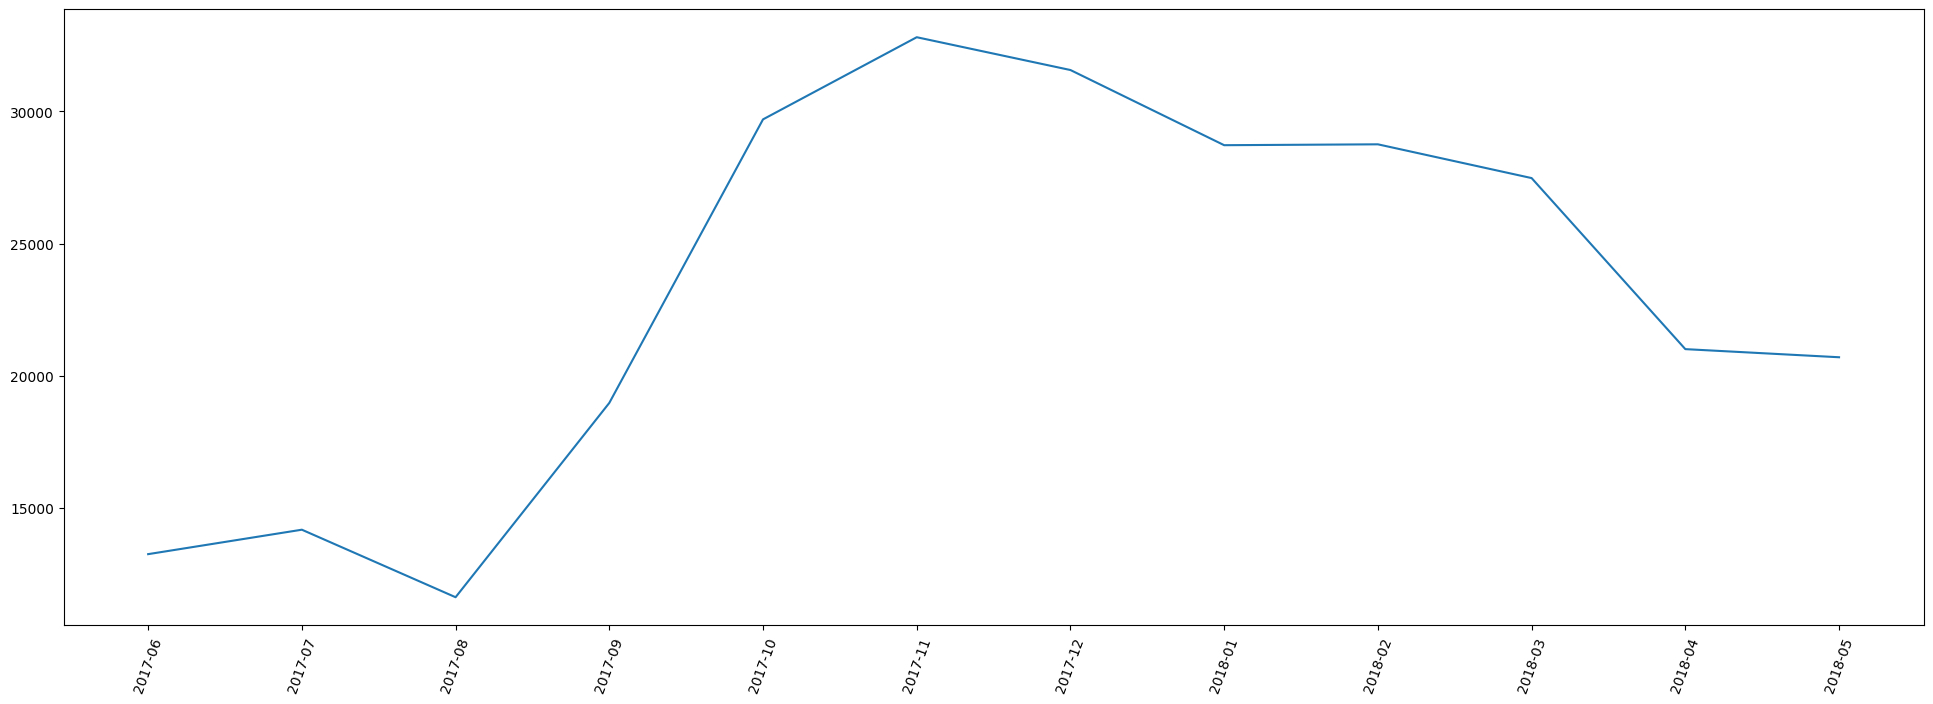

In [ ]:
#график 'MAU'
fig, ax = plt.subplots(figsize = (24, 8))
ax = sns.lineplot(data = mau,
             x = 'month',
             y = 'count_unique_user_one_month');
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = 70);

In [ ]:
#сколько раз за день пользователи в среднем заходят на сайт

dau = dau.reset_index()
dau['mean_count_user_in_day'] = dau['count_all_user_one_day'] / dau['count_unique_user_one_day']
dau

,day_visits,count_all_user_one_day,count_unique_user_one_day,mean_count_user_in_day
0,2017-06-01,664,605,1.097521
1,2017-06-02,658,608,1.082237
2,2017-06-03,477,445,1.071910
3,2017-06-04,510,476,1.071429
4,2017-06-05,893,820,1.089024
...,...,...,...,...
359,2018-05-27,672,620,1.083871
360,2018-05-28,1156,1039,1.112608
361,2018-05-29,1035,948,1.091772
362,2018-05-30,1410,1289,1.093871


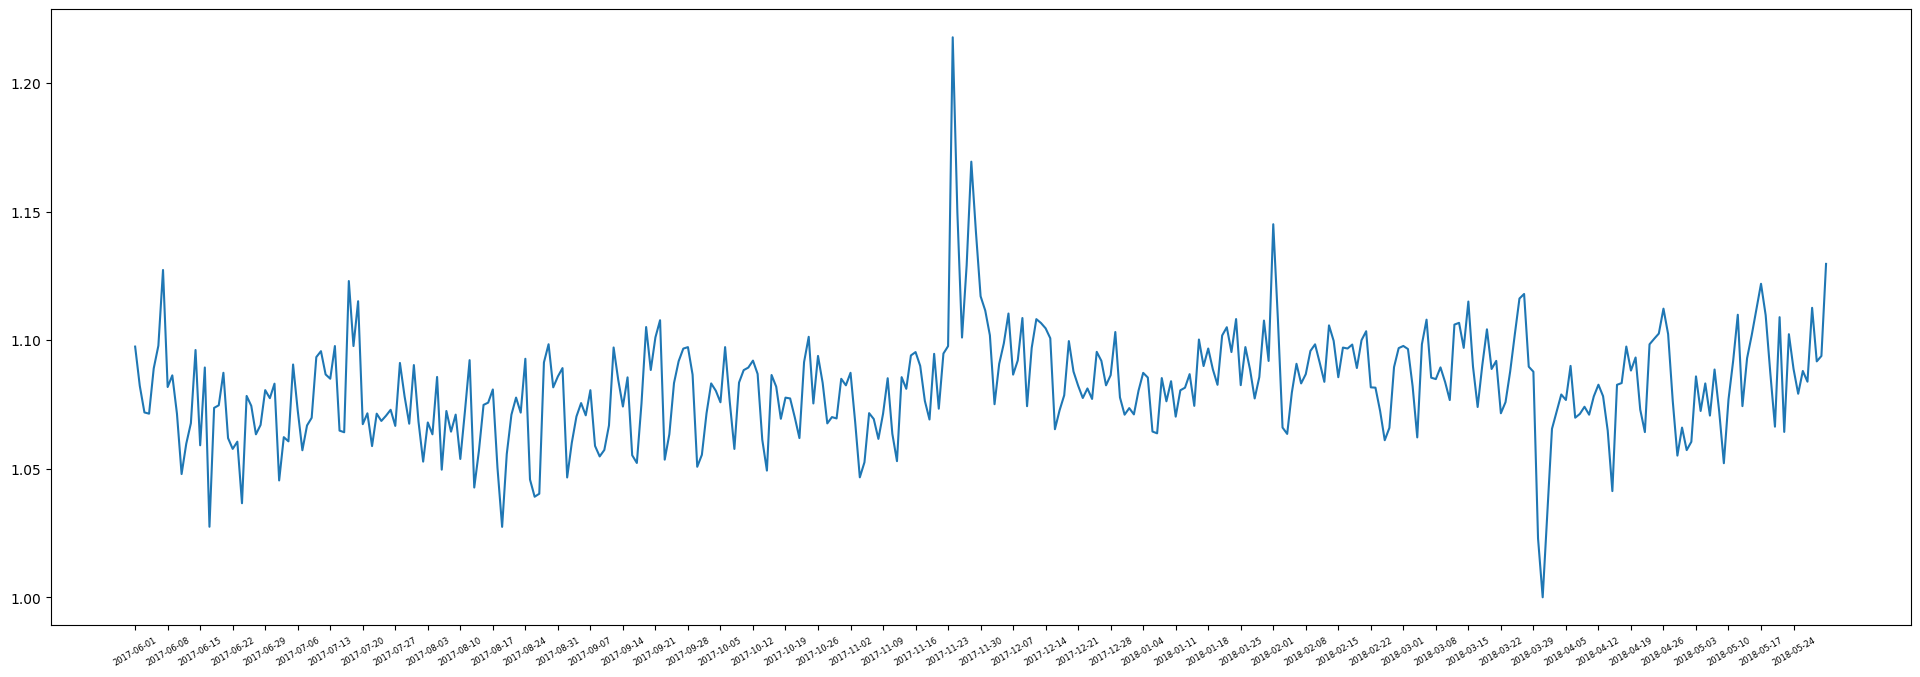

In [ ]:
fig, ax = plt.subplots(figsize = (24, 8))
ax = sns.lineplot(data = dau,
             y = 'mean_count_user_in_day',
             x = 'day_visits');
plt.xlabel('')
plt.ylabel('')
plt.xticks(np.arange(dau.day_visits.min(),
                     dau.day_visits.max(),
                     pd.to_timedelta('7 day')),
           rotation = 30, fontsize = 6);

In [ ]:
df_visits.head(2)

,device,end_ts,source_id,start_ts,user_id,day_visits,week_visits,month_visits,year_visits
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018


In [ ]:
#продолжительность сессии: временя окончания - время начала (/60 -- перевод в минуты)
df_visits['duration_session'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.seconds/60

In [ ]:
#узнать продолжительность типичной пользовательской сессии
#за весь период: среднее, медиана и мода

In [ ]:
df_visits['duration_session'].value_counts()

1.0      53029
0.0      35794
2.0      35748
3.0      26672
4.0      21085
         ...  
297.0        1
308.0        1
239.0        1
390.0        1
272.0        1
Name: duration_session, Length: 312, dtype: int64

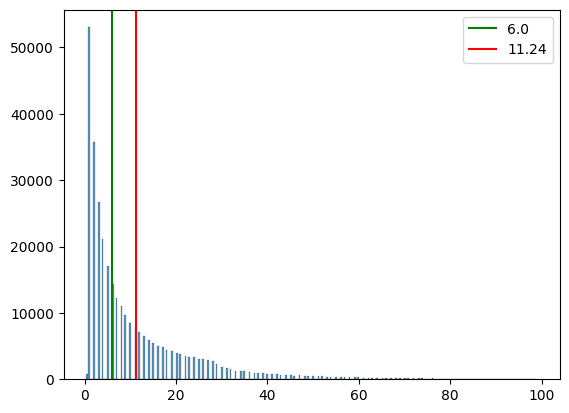

In [ ]:
ax = sns.histplot(data = df_visits[(df_visits.duration_session>0) & (df_visits.duration_session<100)], x = 'duration_session')
plt.xlabel('')
plt.ylabel('')
mediana_my = df_visits[(df_visits.duration_session>0) & (df_visits.duration_session<100)]['duration_session'].median()
mean_my = df_visits[(df_visits.duration_session>0) & (df_visits.duration_session<100)]['duration_session'].mean()
ax.axvline(mediana_my,
           label = f'{mediana_my}',
           color = 'green')
ax.axvline(mean_my,
           label = f'{np.round(mean_my,2)}',
           color = 'red')
plt.legend()


In [ ]:
#рассчитать Retention Rate, применяя когортный анализ.
# Когорты формируем по месяцу первого посещения:

# 1. Рассчитываем для каждого клиента время первого посещения
# 2. Для каждого клиента из самого первого времени его посещения выделяем месяц -- номер когорты
# 3. Для каждого клиента из всех времен первых посещений `start_ts` выделяем все месяца его активностей -- как долго клиент находился в когорте -- периоды существования когорты (порядковые номера месяцев)
# 4. Определяем текущее время жизни каждой когорты: период существования когорты - номер когорты: нормируем на месяц и выделяем целую часть
# 5. Считаем  количество клиентов в каждой когорте на каждый период
# 6. подсчет количества клиентов в каждой когорте на начальный  период
# 7. Считаем RR

#показать изменения метрики во времени на графике

In [ ]:
#находим время первого посещения для каждого клиента
time_first_visit = df_visits.groupby('user_id').\
agg(time_first_visit_user = ('start_ts', 'min')).\
reset_index()

In [ ]:
time_first_visit.head(2)

,user_id,time_first_visit_user
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00


In [ ]:
df_visits.head(2)

,device,end_ts,source_id,start_ts,user_id,day_visits,week_visits,month_visits,year_visits,duration_session
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017,18.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018,28.0


In [ ]:
#для каждого клиента в отдельный столбец помещаем время первого посещения
df_visits = df_visits.merge(time_first_visit, on = 'user_id')

In [ ]:
df_visits.head(20)

,device,end_ts,source_id,start_ts,user_id,day_visits,week_visits,month_visits,year_visits,duration_session,time_first_visit_user
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017,18.0,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018,28.0,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017,0.0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018,24.0,2018-03-09 20:05:00
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,10,3,2018,28.0,2018-03-09 20:05:00
5,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,2017,0.0,2017-12-27 14:06:00
6,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,35,9,2017,1.0,2017-09-03 21:35:00
7,desktop,2017-10-27 16:02:00,3,2017-10-27 15:20:00,16007536194108375387,2017-10-27,43,10,2017,42.0,2017-09-03 21:35:00
8,desktop,2017-09-04 17:56:00,4,2017-09-04 17:37:00,16007536194108375387,2017-09-04,36,9,2017,19.0,2017-09-03 21:35:00
9,desktop,2017-10-28 00:04:00,3,2017-10-27 23:56:00,16007536194108375387,2017-10-27,43,10,2017,8.0,2017-09-03 21:35:00


In [ ]:
#для каждого клиента из даты его первого посещения выделяем месяц для формирования когорты
df_visits['month_first_visit'] = df_visits['time_first_visit_user'].dt.strftime("%Y-%m-%d").astype('datetime64[M]')

#для каждого клиента из даты посещения выделяем месяц его активности
df_visits['activity_month'] = df_visits['start_ts'].dt.strftime("%Y-%m-%d").astype('datetime64[M]')
df_visits.head(10)

,device,end_ts,source_id,start_ts,user_id,day_visits,week_visits,month_visits,year_visits,duration_session,time_first_visit_user,month_first_visit,activity_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017,18.0,2017-12-20 17:20:00,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018,28.0,2018-02-19 16:53:00,2018-02-01,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017,0.0,2017-07-01 01:54:00,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018,24.0,2018-03-09 20:05:00,2018-03-01,2018-05-01
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,10,3,2018,28.0,2018-03-09 20:05:00,2018-03-01,2018-03-01
5,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,2017,0.0,2017-12-27 14:06:00,2017-12-01,2017-12-01
6,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,35,9,2017,1.0,2017-09-03 21:35:00,2017-09-01,2017-09-01
7,desktop,2017-10-27 16:02:00,3,2017-10-27 15:20:00,16007536194108375387,2017-10-27,43,10,2017,42.0,2017-09-03 21:35:00,2017-09-01,2017-10-01
8,desktop,2017-09-04 17:56:00,4,2017-09-04 17:37:00,16007536194108375387,2017-09-04,36,9,2017,19.0,2017-09-03 21:35:00,2017-09-01,2017-09-01
9,desktop,2017-10-28 00:04:00,3,2017-10-27 23:56:00,16007536194108375387,2017-10-27,43,10,2017,8.0,2017-09-03 21:35:00,2017-09-01,2017-10-01


In [ ]:
#время жизни каждой когорты -- сколько периодов (месяцев) она существовала, начиная от первого посещения
df_visits['cohort_lifetime'] = df_visits['activity_month'] - df_visits['month_first_visit']

#нормируем на месяц
df_visits['cohort_lifetime'] = df_visits['cohort_lifetime'] / np.timedelta64(1, 'M')

#округляем время жизни когорт
df_visits['cohort_lifetime'] = df_visits['cohort_lifetime'].round().astype('int')

In [ ]:
df_visits.head(10)

,device,end_ts,source_id,start_ts,user_id,day_visits,week_visits,month_visits,year_visits,duration_session,time_first_visit_user,month_first_visit,activity_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017,18.0,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018,28.0,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017,0.0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018,24.0,2018-03-09 20:05:00,2018-03-01,2018-05-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,10,3,2018,28.0,2018-03-09 20:05:00,2018-03-01,2018-03-01,0
5,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,2017,0.0,2017-12-27 14:06:00,2017-12-01,2017-12-01,0
6,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,35,9,2017,1.0,2017-09-03 21:35:00,2017-09-01,2017-09-01,0
7,desktop,2017-10-27 16:02:00,3,2017-10-27 15:20:00,16007536194108375387,2017-10-27,43,10,2017,42.0,2017-09-03 21:35:00,2017-09-01,2017-10-01,1
8,desktop,2017-09-04 17:56:00,4,2017-09-04 17:37:00,16007536194108375387,2017-09-04,36,9,2017,19.0,2017-09-03 21:35:00,2017-09-01,2017-09-01,0
9,desktop,2017-10-28 00:04:00,3,2017-10-27 23:56:00,16007536194108375387,2017-10-27,43,10,2017,8.0,2017-09-03 21:35:00,2017-09-01,2017-10-01,1


In [ ]:
#на каждый период жизни когорт считаем количество уникальных пользователей в каждой из них
cohorts = df_visits.groupby(['month_first_visit','cohort_lifetime']).agg({'user_id':'nunique'}).reset_index()

#для каждой когорты указываем количество клиентов на начало жизни -- на первый месяц
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['month_first_visit', 'user_id']]

#переименуем столбцы для последующего объединения с набором данных о когортах
initial_users_count = initial_users_count.rename(columns={'user_id':'cohort_users'})

In [ ]:
#объединяем данные:
#теперь по каждой когорте известно количество клиентов на первый месяц жизни и
#количество клиентов на каждый период жизни
cohorts = cohorts.merge(initial_users_count, on = 'month_first_visit')

In [ ]:
cohorts.head(20)

,month_first_visit,cohort_lifetime,user_id,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
5,2017-06-01,5,947,13259
6,2017-06-01,6,809,13259
7,2017-06-01,7,766,13259
8,2017-06-01,8,694,13259
9,2017-06-01,9,674,13259


In [ ]:
#считаем RR: делим количество клиентов на каждый период жизни на количество клиентов на первый месяц жизни
cohorts['retention'] = cohorts['user_id']/cohorts['cohort_users']

In [ ]:
cohorts.head(2)

,month_first_visit,cohort_lifetime,user_id,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664


In [ ]:
#формируем сводную таблицу
retention_pivot = cohorts.pivot_table(
    index = 'month_first_visit',
    columns = 'cohort_lifetime',
    values = 'retention',
    aggfunc = 'sum' )

In [ ]:
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
month_first_visit,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#по каждой когорте считаем средний RR -- первый период (0) не считаем
retention_pivot['средний RR'] = retention_pivot[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]].mean(axis=1)

In [ ]:
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11,средний RR
month_first_visit,,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951,0.058307
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN,0.045594
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN,0.047376
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN,0.045685
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN,0.039716
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN,0.040003
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN,0.032840
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.036068
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034209


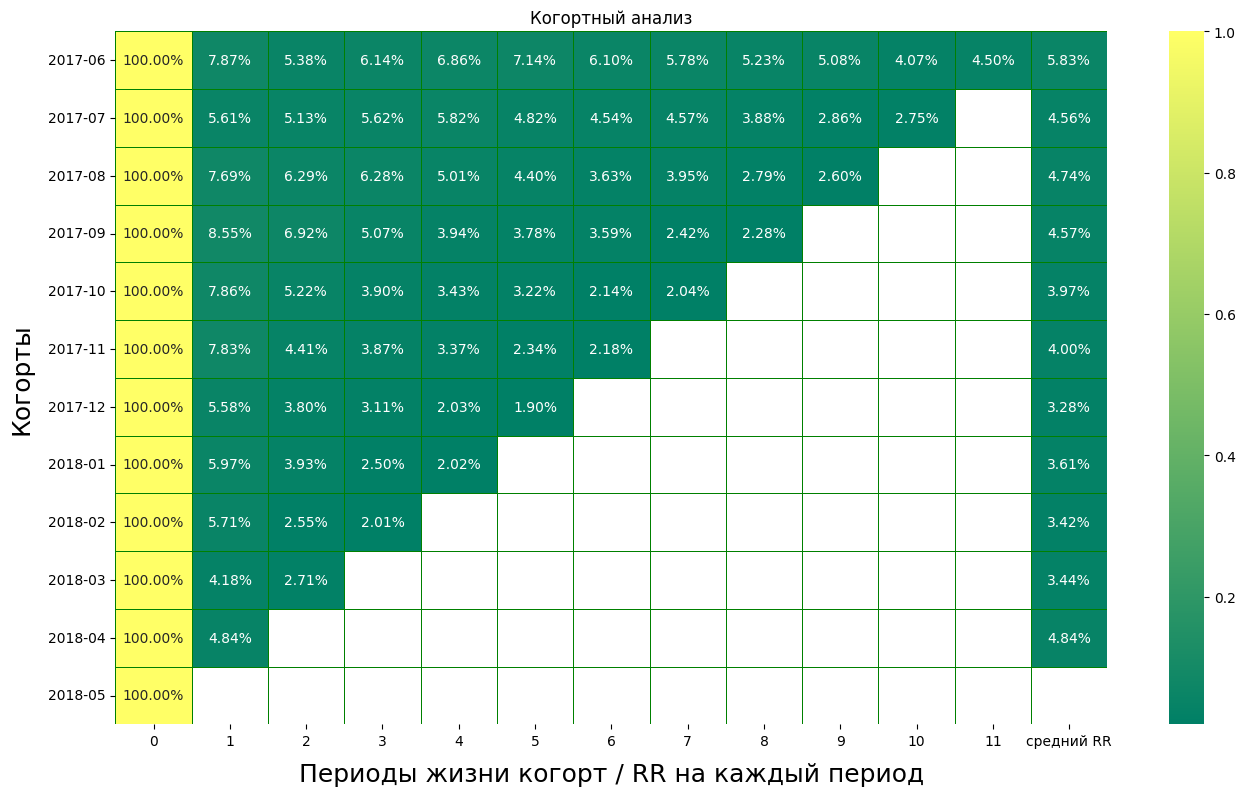

In [ ]:
#для визуализации используем тепловую карту

plt.figure(figsize = (16, 9))
plt.title('Когортный анализ')
ax = sns.heatmap(retention_pivot,
                 annot=True,
                 fmt='.2%',
                 linecolor='green', linewidths=.5, cmap="summer")
ax.set_yticklabels(retention_pivot.index.strftime('%Y-%m'))
ax.set_ylabel("Когорты", fontsize=18, labelpad=10)
ax.set_xlabel("Периоды жизни когорт / RR на каждый период", fontsize=18, labelpad=10)
plt.show()

In [ ]:
#найти средний Retention Rate на второй месяц «жизни» когорт.
print(f'Средний RR на второй месяц «жизни» когорт -- {np.round(retention_pivot[1].mean()*100,2)}')

Средний RR на второй месяц «жизни» когорт -- 6.52


Это очень низкий показатель -- около 6% клиентов на второй месяц возвращаются.  

Зная RR, можно посчитать коэффициент оттока клиентов -- `churn rate`: CR = 100% - RR.

# 2.2. Метрики электронной коммерции

2.2.1. Исследовать, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки;

2.2.2. Применяя когортный анализ, рассчитать среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев;

2.2.3. Рассчитать средний чек, применяя группировку по времени совершения покупки. Построить график, отражающий изменения метрики во времени;

2.2.4. Исследовать динамику LTV на покупателя по когортам. Рассчитать средний LTV по когортам за 6 месяцев. Отразить изменения метрики во времени на графике.

In [ ]:
# 2.2.1. Исследовать, сколько времени в среднем проходит
# с момента первого посещения сайта до совершения покупки

#для каждого клиента находим время первой покупки
time_first_orders = df_orders.groupby(['user_id']).agg(date_first_buy_ts = ('buy_ts', 'min')).\
reset_index()
#ранее уже считали для каждого клиента время его первого посещения -- time_first_visit

#для каждого клиента добавляем время первого посещения

#параметр how определяет способ
#объединения данных: inner(по умолчанию), left, right
time_first_orders = time_first_orders.merge(time_first_visit,
                                              how = 'left')

# если нам нужны клиенты, которые посещаю, но не покупают, то так

# time_first_orders = time_first_orders.merge(time_first_visit,
#                                              how = 'right')
# time_first_orders.loc[time_first_orders.date_first_buy_ts.isna()]


In [ ]:
time_first_orders

,user_id,date_first_buy_ts,time_first_visit_user
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00
...,...,...,...
36518,18445147675727495770,2017-11-24 09:03:00,2017-08-20 13:30:00
36519,18445407535914413204,2017-09-22 23:55:00,2017-09-22 23:48:00
36520,18445601152732270159,2018-03-26 22:54:00,2017-08-07 11:51:00
36521,18446156210226471712,2018-02-18 19:34:00,2017-11-07 10:01:00


In [ ]:
#находим время до первой покупки и переводим его в минуты
time_first_orders['time_to_first_purchase'] = (
    time_first_orders['date_first_buy_ts'] - time_first_orders['time_first_visit_user']) \
    / np.timedelta64(1, 'm')

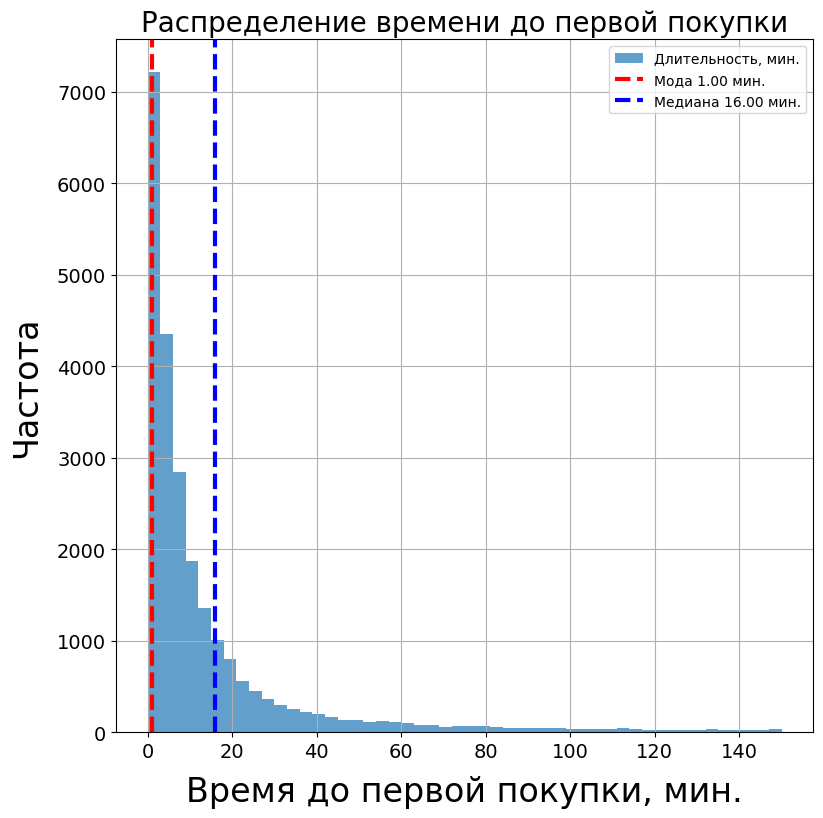

In [ ]:
#визуализация
ax = time_first_orders['time_to_first_purchase'].hist(figsize = (9,9),\
                                                      bins = 50, alpha=0.7,\
                                                      label='Длительность, мин.',
                                                      range = (0,150));
ax.set_xlabel("Время до первой покупки, мин.", fontsize=24, labelpad=10)
ax.set_ylabel("Частота", fontsize=24, labelpad=10)
ax.set_title("Распределение времени до первой покупки", fontsize=20)
plt.axvline(x = time_first_orders['time_to_first_purchase'].mode()[0], color = 'r', linewidth=3,\
            linestyle = '--', label = 'Мода {:.2f} мин.'.format(time_first_orders['time_to_first_purchase'].mode()[0]))
plt.axvline(x = time_first_orders['time_to_first_purchase'].median(), color = 'b', linewidth=3,\
            linestyle = '--',\
            label = 'Медиана {:.2f} мин.'.format(time_first_orders['time_to_first_purchase'].median()))
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend()
plt.show()

In [ ]:
print('Модальное время от первой сессии до первой покупки {} мин.'.format(time_first_orders['time_to_first_purchase'].mode()[0]))
print('Медианное время от первой сессии до первой покупки {} мин.'.format(time_first_orders['time_to_first_purchase'].median()))
print('Среднее время от первой сессии до первой покупки {} суток.'.format(int(time_first_orders['time_to_first_purchase'].mean()/60/24)))


Модальное время от первой сессии до первой покупки 1.0 мин.
Медианное время от первой сессии до первой покупки 16.0 мин.
Среднее время от первой сессии до первой покупки 16 суток.


In [ ]:
#среднее количество покупок на за месяц на одного покупателя

#месяц первой покупки
df_orders['buy_month'] = df_orders['buy_ts'].dt.strftime("%Y-%m-%d").astype('datetime64[M]')

# группируем по месяцу покупки и покупателю: сколько каждый
# клиент покупал в каждом месяце и берем среднее
df_orders.groupby(['buy_month', 'user_id']).agg(
    count_by_month_one_user = ('buy_ts', 'count')).mean(0)


count_by_month_one_user    1.229065
dtype: float64

## Применяя когортный анализ, рассчитать среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев

In [ ]:
time_first_orders.head(2)

,user_id,date_first_buy_ts,time_first_visit_user,time_to_first_purchase
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,154022.0
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0.0


In [ ]:
#для каждого поокупателя добавляем время первого посещения -- считали выше
df_orders = df_orders.merge(time_first_orders[['user_id', 'time_first_visit_user']], on='user_id')

In [ ]:
df_orders.head(2)

,buy_ts,revenue,user_id,buy_month,time_first_visit_user
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01 00:14:00


In [ ]:

#выделяем месяц первого посещения -- по нему будем формировать когорты
df_orders['first_visit_month'] = df_orders['time_first_visit_user'].dt.strftime("%Y-%m-%d").astype('datetime64[M]')

# выделяем месяца покупок
df_orders['buy_month'] = df_orders['buy_ts'].dt.strftime("%Y-%m-%d").astype('datetime64[M]')

df_orders

,buy_ts,revenue,user_id,buy_month,time_first_visit_user,first_visit_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01 00:09:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01 00:14:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01 00:25:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01 00:14:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01 07:31:00,2017-06-01
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-31 09:11:00,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-31 23:05:00,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-31 23:52:00,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2017-10-23 12:32:00,2017-10-01


In [ ]:
#находим время жизни каждой когорты: по всем заказам находим (время покупки - время первого посещения покупки).нормируем на месяц.выделяем целое число
df_orders['lifetime'] = ((df_orders['buy_month'] - df_orders['first_visit_month'])/ np.timedelta64(1, 'M')).round().astype('int')

#по каждой когорте на каждый период находим количество заказов и количество уникальных клиентов
orders_grouped_by_cohorts = (
    df_orders.groupby(['first_visit_month', 'lifetime']).agg(n_orders = ('user_id', 'count'),
                                                           n_users = ('user_id', 'nunique')).\
                             reset_index()
                             )

#по когорте и по периоду жизни считаем количество покупок на одного клиента
orders_grouped_by_cohorts['orders_per_user'] = orders_grouped_by_cohorts['n_orders'] / orders_grouped_by_cohorts['n_users']

#сводная таблица: среднее количество покупок на одного покупателя в когорте на каждый период
cohorts = orders_grouped_by_cohorts.pivot_table(index = 'first_visit_month',
                                                columns = 'lifetime',
                                                values = 'orders_per_user',
                                                aggfunc = 'mean')
#среднее по каждой которте за все периоды
cohorts['mean'] = cohorts.mean(axis=1)

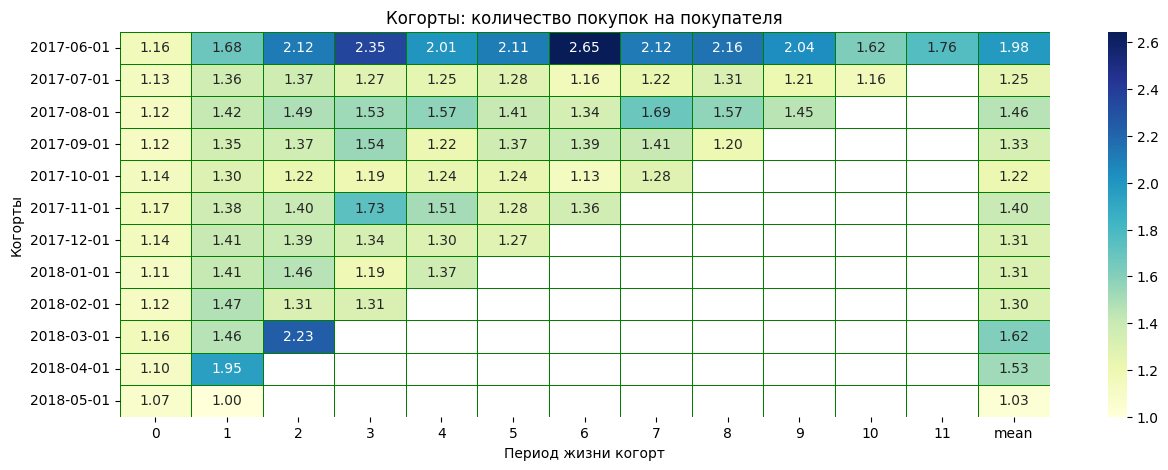

In [ ]:
#визуализация
plt.figure(figsize=(15, 5))
plt.title('Когорты: количество покупок на покупателя')
ax = sns.heatmap(cohorts, annot=True, fmt=".2f", linecolor='green', linewidths=.5, cmap="YlGnBu")
ax.set_yticklabels(cohorts.index.strftime('%Y-%m-%d').values)
plt.xlabel('Период жизни когорт')
plt.ylabel('Когорты')
plt.show()

In [ ]:
print('За 6 месяцев в среднем каждый посетитель совершает {:.2f} покупок '.format(cohorts[5].mean()))

За 6 месяцев в среднем каждый посетитель совершает 1.42 покупок 


Рассчитать средний чек, применяя группировку по времени совершения покупки. Построить график, отражающий изменения метрики во времени.

1. Группируем таблицу `df_orders` по месяцу совершения покупки и по каждому месяцу находим сумму покупок и уникальных посетителей;
2. Для каждого месяца находим отношение суммы покупок к числу посетителей.

определимся, что понимается под средним чеком:
$$
\text{ежемесячный средний чек} = \dfrac{\text{сумма покупок в месяц}}{\text{число уникальных пользователей в месяц}}
$$

In [ ]:
#на каждый месяц покупки находим сумму покупок и количество уникальных покупателей
orders_grouped_by_first_buy_month = df_orders.groupby(['buy_month']).agg({'revenue':'sum', 'user_id':'nunique'}).reset_index()

#новые заголовки
orders_grouped_by_first_buy_month.columns = ['buy_month', 'revenue_total', 'n_users']

#расчет выборочного среднего
orders_grouped_by_first_buy_month['revenue_per_user'] = orders_grouped_by_first_buy_month['revenue_total'] / orders_grouped_by_first_buy_month['n_users']
print('Средний чек с группировкой по времени совершения покупки равен {:.3f}'.format(orders_grouped_by_first_buy_month['revenue_per_user'].mean()))

Средний чек с группировкой по времени совершения покупки равен 5.867


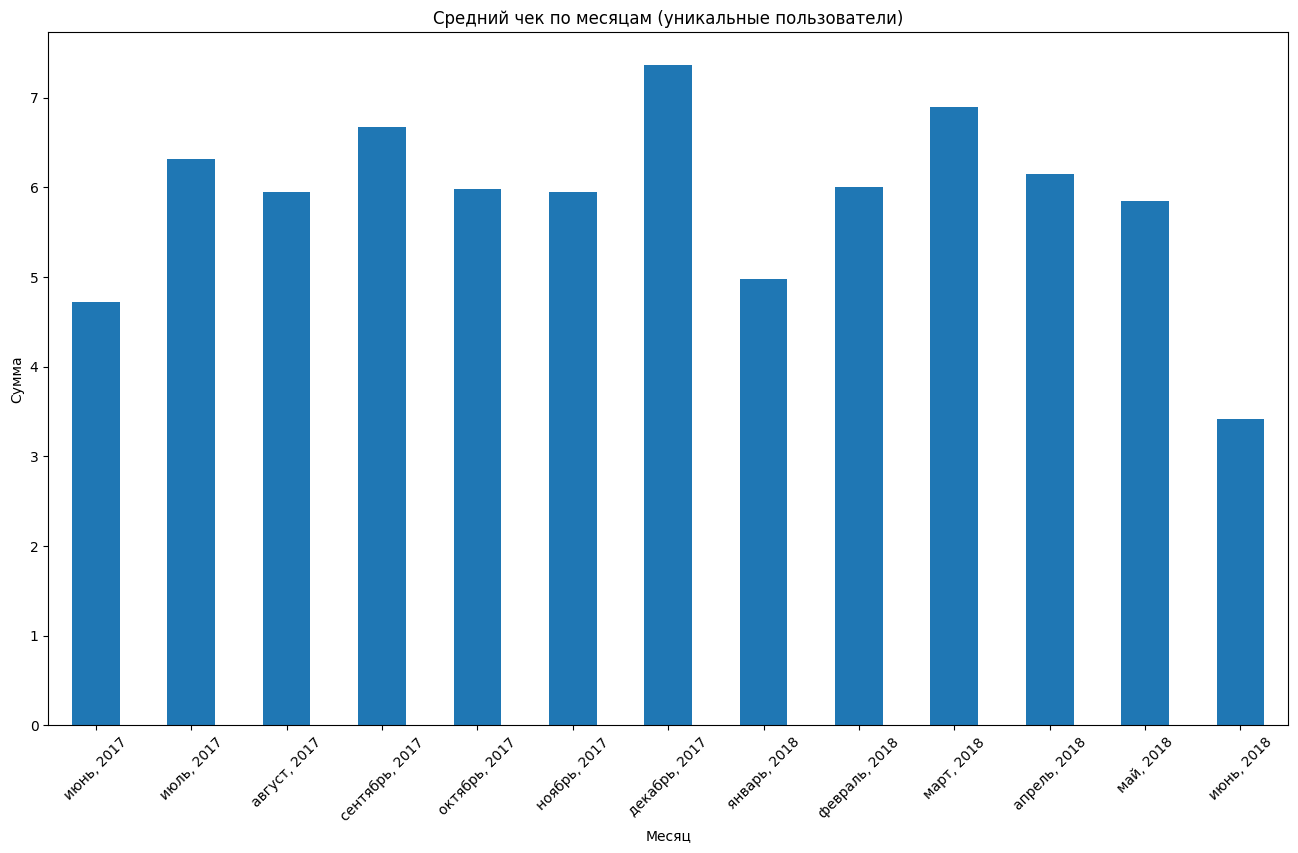

In [ ]:
#визуализация динамики среднего чека

month_lst = ['июнь, 2017', 'июль, 2017','август, 2017','сентябрь, 2017', \
             'октябрь, 2017','ноябрь, 2017', 'декабрь, 2017','январь, 2018', \
             'февраль, 2018', 'март, 2018', 'апрель, 2018', 'май, 2018', 'июнь, 2018']
ax = orders_grouped_by_first_buy_month['revenue_per_user'].plot(kind='bar', figsize=(16, 9))
plt.title('Средний чек по месяцам (уникальные пользователи)')
ax.set_xlabel('Месяц')
ax.set_ylabel('Сумма')
ax.set_xticklabels(month_lst, rotation=45)
plt.show()

In [ ]:
# Исследовать динамику LTV на покупателя по когортам.
# Рассчитать средний LTV по когортам за 6 месяцев.
# Отразить изменения метрики во времени на графике.

# Когорты будем формировать по
# - месяцу покупки;
# - источнику трафика;
# - устройству.

# По каждой когорте рассчитаем средний LTV.

#по каждому пользователю берем дату первого посещения, устройство и канал

users = (df_visits
               .sort_values(by=['user_id', 'start_ts'])
               .groupby('user_id')
               .agg({'start_ts': 'first', 'device': 'first', 'source_id': 'first'})
               .rename(columns={'start_ts': 'firts_visit_day'})
              )
#выделяем месяц первого визита
users['first_visit_month'] = users['firts_visit_day'].dt.strftime("%Y-%m-%d").astype('datetime64[M]')
display(users.head())

,firts_visit_day,device,source_id,first_visit_month
user_id,,,,
11863502262781,2018-03-01 17:27:00,touch,3,2018-03-01
49537067089222,2018-02-06 15:55:00,touch,2,2018-02-01
297729379853735,2017-06-07 18:47:00,desktop,3,2017-06-01
313578113262317,2017-09-18 22:49:00,desktop,2,2017-09-01
325320750514679,2017-09-30 14:29:00,desktop,5,2017-09-01


In [ ]:
#к покупкам пользователя добавляем устройство и канал

users_and_orders = (df_orders.set_index('user_id').join(users,
                                                        how='left',
                                                        lsuffix = 'left')
                   )

In [ ]:
#отбираем столбцы для формирования когорт
users_and_orders = (users_and_orders[['revenue', 'buy_month',
                                      'device', 'source_id', 'first_visit_month']])

In [ ]:
# периоды жизни когорт
users_and_orders['buy_lifetime'] = (((users_and_orders['buy_month'] - users_and_orders['first_visit_month']) /
                                      np.timedelta64(1, 'M')).round().astype('int')
                                   )

In [ ]:
#функция для формирования когорт по разным признакам: первому визиту, каналу прихода клиента и устройству
def get_ltv(cohort_group):
    #по заданному признаку считаем количество уникальных клиентов в каждой когорте
    ltv = (users_and_orders
              .merge(users_and_orders.reset_index()
              .groupby([cohort_group])
              .agg({'user_id': 'nunique'}).reset_index(), on=cohort_group)
           .rename(columns={'user_id': 'cohort_size'})
          )

    #по заданному признаку считаем ltv по каждой когорте
    #для каждого периода считаем доход и размер когорты
    ltv = ltv.groupby([cohort_group, 'buy_lifetime']).agg({'revenue': 'sum', 'cohort_size': 'first'}).reset_index()
    #расчет ltv по каждому периоду и общий по когорте
    ltv['ltv'] = ltv['revenue'] / ltv['cohort_size']
    ltv_pivot = ltv.pivot_table(index=cohort_group, columns='buy_lifetime', values='ltv', aggfunc='sum')
    ltv = ltv.set_index(cohort_group)
    ltv_pivot = ltv_pivot.cumsum(axis = 1).round(2)

    #средний ltv по источнику и устройству
    #средний ltv по всем котортам за месяц
    if ((cohort_group == 'source_id') | (cohort_group == 'device')):
        ltv_pivot['mean'] = ltv_pivot.mean(axis=1)
    else:
        ltv_pivot.loc['mean'] = ltv_pivot.mean()

    #визуализация
    plt.figure(figsize=(16, 7))
    plt.title('ltv: ' + cohort_group)
    ax = sns.heatmap(ltv_pivot, annot=True,
                     fmt=".2f",
                     linecolor='green',
                     linewidths=.5, cmap="YlGnBu")
    if cohort_group == 'first_visit_month':
        list_xticks = list(cohorts.index.strftime('%Y-%m-%d').values)
        list_xticks.append('mean')
        ax.set_yticklabels(list_xticks)
    plt.xlabel('Возраст когорты, мес.')
    plt.ylabel('Когорта: '+ cohort_group)
    plt.show()
    return ltv

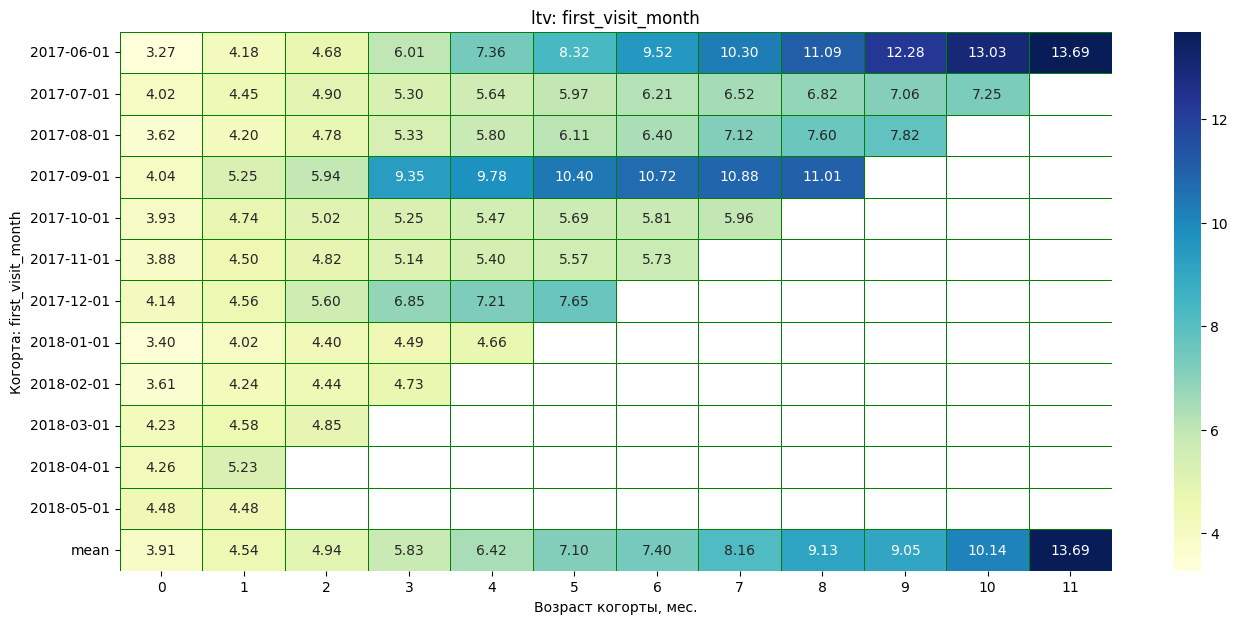

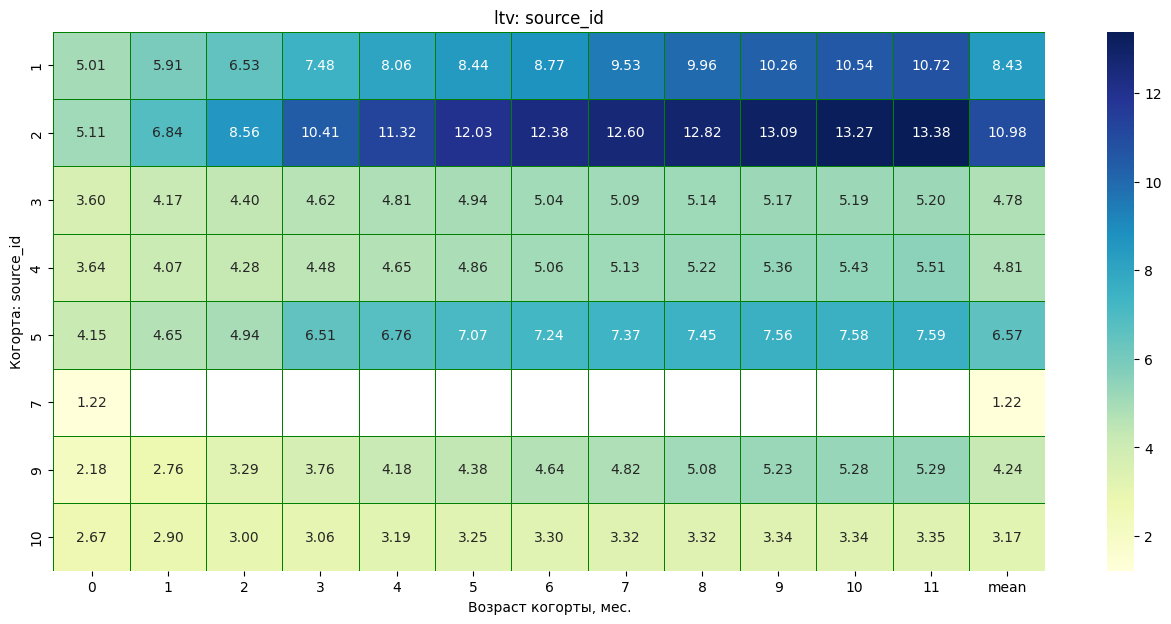

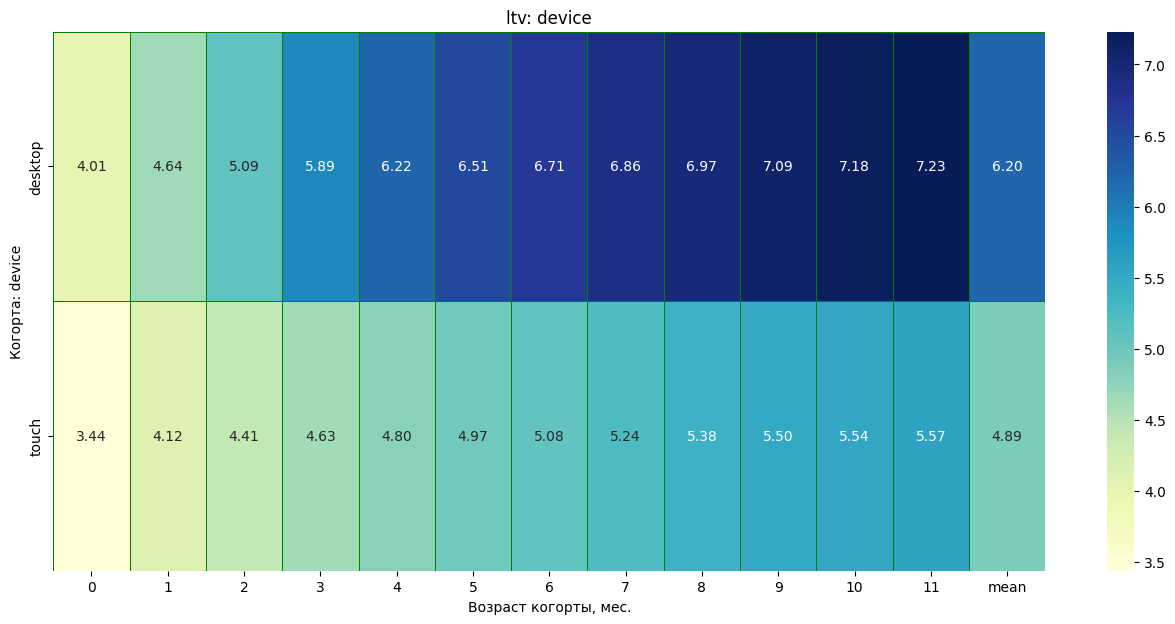

In [ ]:
#формирование когорт по визиту, каналу и устройству
cohort_groups = ['first_visit_month', 'source_id', 'device']
ltv_lst = []
for gr in cohort_groups:
    ltv_lst.append(get_ltv(gr))

# 2.3. Маркетинговые метрики

Посчитать и отобразить на графиках, как маркетинговые метрики различаются по рекламным источникам:

2.3.1. Посчитать общую сумму расходов на маркетинг. Выяснить, как траты распределены по источникам. Визуализировать изменения метрик во времени;

2.3.2. Рассчитать средний CAC на одного покупателя для всего проекта и для каждого источника трафика. Отразить изменения метрик на графиках;

2.3.3. Рассчитать ROI по когортам в разрезе источников. Сравнить окупаемость за одинаковые периоды жизни когорт. Построить графики, отражающие изменения метрик во времени.




#### Затраты на маркетинг: всего/ распределение затрат по источникам/ распределение затраты по времени  

In [ ]:
#суммарные затраты на маркетинг
print('Общие затраты на маркетинг {:.2f} $'.format(df_costs.costs.sum()))

Общие затраты на маркетинг 329131.62 $


In [ ]:
#суммарные затраты на маркетинг по источникам
costs_by_source = df_costs.groupby('source_id').sum()
print('Затраты на маркетинг по источникам', '\n', costs_by_source)

Затраты на маркетинг по источникам 
                costs
source_id           
1           20833.27
2           42806.04
3          141321.63
4           61073.60
5           51757.10
9            5517.49
10           5822.49


<ipython-input-282-abd9231a7768>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  costs_by_source = df_costs.groupby('source_id').sum()


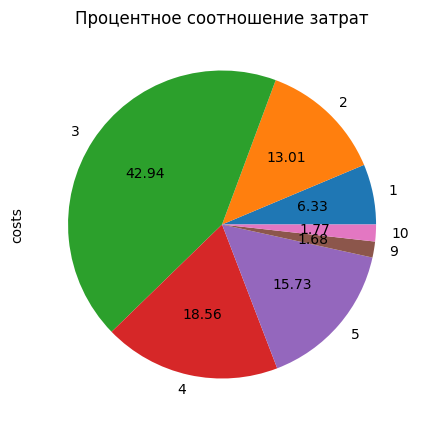

In [ ]:
ax = costs_by_source.plot.pie(y='costs', autopct='%.2f', figsize=(5, 5), legend = False)
plt.title('Процентное соотношение затрат')
plt.show()

In [ ]:
#Распределение затрат по месяцам
df_costs['costs_month'] = df_costs['dt'].dt.strftime("%Y-%m-%d").astype('datetime64[M]')
costs_by_month = df_costs.groupby('costs_month').agg({'costs':'sum'}).reset_index()
print('Распределение затрат по месяцам', '\n', costs_by_month)

Распределение затрат по месяцам 
    costs_month     costs
0   2017-06-01  18015.00
1   2017-07-01  18240.59
2   2017-08-01  14790.54
3   2017-09-01  24368.91
4   2017-10-01  36322.88
5   2017-11-01  37907.88
6   2017-12-01  38315.35
7   2018-01-01  33518.52
8   2018-02-01  32723.03
9   2018-03-01  30415.27
10  2018-04-01  22289.38
11  2018-05-01  22224.27


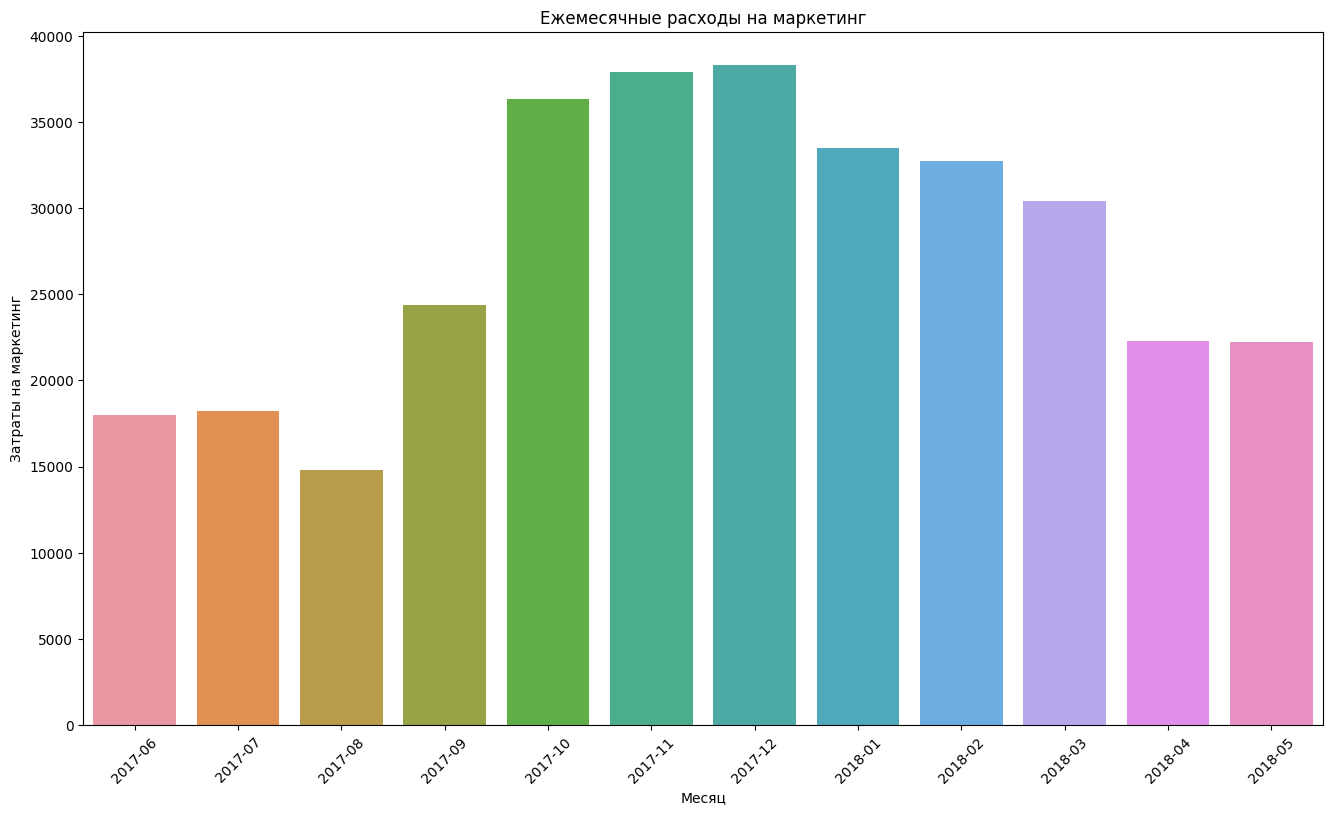

In [ ]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="costs_month",
                 y="costs",
                 data=costs_by_month)
ax.set_xticklabels(costs_by_month['costs_month'].dt.strftime("%Y-%m"), rotation=45)
plt.title('Ежемесячные расходы на маркетинг')
ax.set_xlabel('Месяц')
ax.set_ylabel('Затраты на маркетинг')
plt.show()

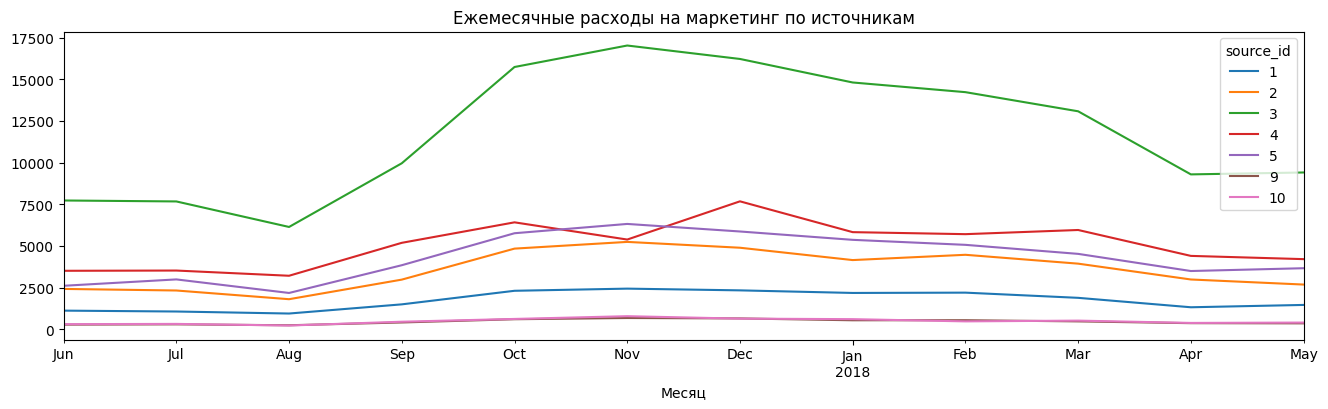

In [ ]:
#динамика расходов по источникам
costs_source = df_costs.pivot_table(index = 'costs_month',
                                    columns = 'source_id',
                                    values = 'costs',
                                    aggfunc = 'sum')
costs_source.plot(figsize = (16,4),
                  title = 'Ежемесячные расходы на маркетинг по источникам')
plt.xlabel('Месяц')
plt.show()

#### Средний CAC для каждого: покупателя/источника трафика

In [ ]:
users = (df_visits
               .sort_values(by=['user_id', 'start_ts'])
               .groupby('user_id')
               .agg({'start_ts': 'first', 'device': 'first', 'source_id': 'first'})
               .rename(columns={'start_ts': 'firts_visit_day'})
              )
users['firts_visit_day'] = users['firts_visit_day'].dt.strftime('%Y-%m-%d').astype('datetime64[D]')
users['first_visit_month'] = users['firts_visit_day'].dt.strftime('%Y-%m-%d').astype('datetime64[M]')
display(users.head())

,firts_visit_day,device,source_id,first_visit_month
user_id,,,,
11863502262781,2018-03-01,touch,3,2018-03-01
49537067089222,2018-02-06,touch,2,2018-02-01
297729379853735,2017-06-07,desktop,3,2017-06-01
313578113262317,2017-09-18,desktop,2,2017-09-01
325320750514679,2017-09-30,desktop,5,2017-09-01


Объединим таблицы с пользователями и издержками, выбрав из пользователей только покупателей. Склеивать таблицы будем по источникам и дню первого посещения (в таблице пользователей)

In [ ]:
df_costs = df_costs.rename(columns={'dt': 'firts_visit_day'})

In [ ]:
users = users.reset_index()
payers = users[users['user_id'].isin(df_orders['user_id'].unique())]
display(payers.head())

,user_id,firts_visit_day,device,source_id,first_visit_month
3,313578113262317,2017-09-18,desktop,2,2017-09-01
22,1575281904278712,2017-06-03,touch,10,2017-06-01
35,2429014661409475,2017-10-11,desktop,3,2017-10-01
36,2464366381792757,2018-01-27,desktop,5,2018-01-01
38,2551852515556206,2017-11-24,desktop,5,2017-11-01


In [ ]:
payers_costs = (payers.set_index(['source_id', 'firts_visit_day'])
                .join(df_costs.set_index(['source_id', 'firts_visit_day']), how='left'))
display(payers_costs.head())

user_id   device first_visit_month  \
source_id firts_visit_day                                                   
1         2017-06-01        469568501030474895  desktop        2017-06-01   
          2017-06-01       1074355127080856382  desktop        2017-06-01   
          2017-06-01       1292867924428534308  desktop        2017-06-01   
          2017-06-01       2050423809815667474  desktop        2017-06-01   
          2017-06-01       3520273333047097992  desktop        2017-06-01   

                           costs costs_month  
source_id firts_visit_day                     
1         2017-06-01        75.2  2017-06-01  
          2017-06-01        75.2  2017-06-01  
          2017-06-01        75.2  2017-06-01  
          2017-06-01        75.2  2017-06-01  
          2017-06-01        75.2  2017-06-01

Посчитаем стоимость привлечения каждого покупателя

In [ ]:
costs_per_payers = payers_costs.groupby(['source_id', 'firts_visit_day']).agg({'user_id': 'count', 'costs': 'first'})
costs_per_payers['costs_per_payers'] = costs_per_payers['costs'] / costs_per_payers['user_id']
costs_per_payers.head()

user_id  costs  costs_per_payers
source_id firts_visit_day                                  
1         2017-06-01            24  75.20          3.133333
          2017-06-02            12  62.25          5.187500
          2017-06-03             8  36.53          4.566250
          2017-06-04             6  55.00          9.166667
          2017-06-05            20  57.08          2.854000

In [ ]:
payers_costs = payers_costs.join(costs_per_payers[['costs_per_payers']], how='left')
payers_costs.head()

user_id   device first_visit_month  \
source_id firts_visit_day                                                   
1         2017-06-01        469568501030474895  desktop        2017-06-01   
          2017-06-01       1074355127080856382  desktop        2017-06-01   
          2017-06-01       1292867924428534308  desktop        2017-06-01   
          2017-06-01       2050423809815667474  desktop        2017-06-01   
          2017-06-01       3520273333047097992  desktop        2017-06-01   

                           costs costs_month  costs_per_payers  
source_id firts_visit_day                                       
1         2017-06-01        75.2  2017-06-01          3.133333  
          2017-06-01        75.2  2017-06-01          3.133333  
          2017-06-01        75.2  2017-06-01          3.133333  
          2017-06-01        75.2  2017-06-01          3.133333  
          2017-06-01        75.2  2017-06-01          3.133333

Рассчитаем `CAC` на каждого покупателя, на каждый источник трафика

In [ ]:
list_sample = ['first_visit_month', 'source_id', 'device']

In [ ]:
cac_lst = []
for gr in list_sample:
    cac = (payers_costs.reset_index()
        .groupby(gr)
        .agg({'user_id': 'count', 'costs_per_payers': 'sum'}))
    cac['cac'] = cac['costs_per_payers'] / cac['user_id']
    cac_lst.append(cac)

In [ ]:
cac_per_users = cac_lst[0]['cac'].reset_index()
display(cac_per_users)

,first_visit_month,cac
0,2017-06-01,6.130996
1,2017-07-01,7.350224
2,2017-08-01,8.466223
3,2017-09-01,7.932623
4,2017-10-01,7.757185
5,2017-11-01,8.872349
6,2017-12-01,9.359597
7,2018-01-01,10.670943
8,2018-02-01,10.213820
9,2018-03-01,10.668735


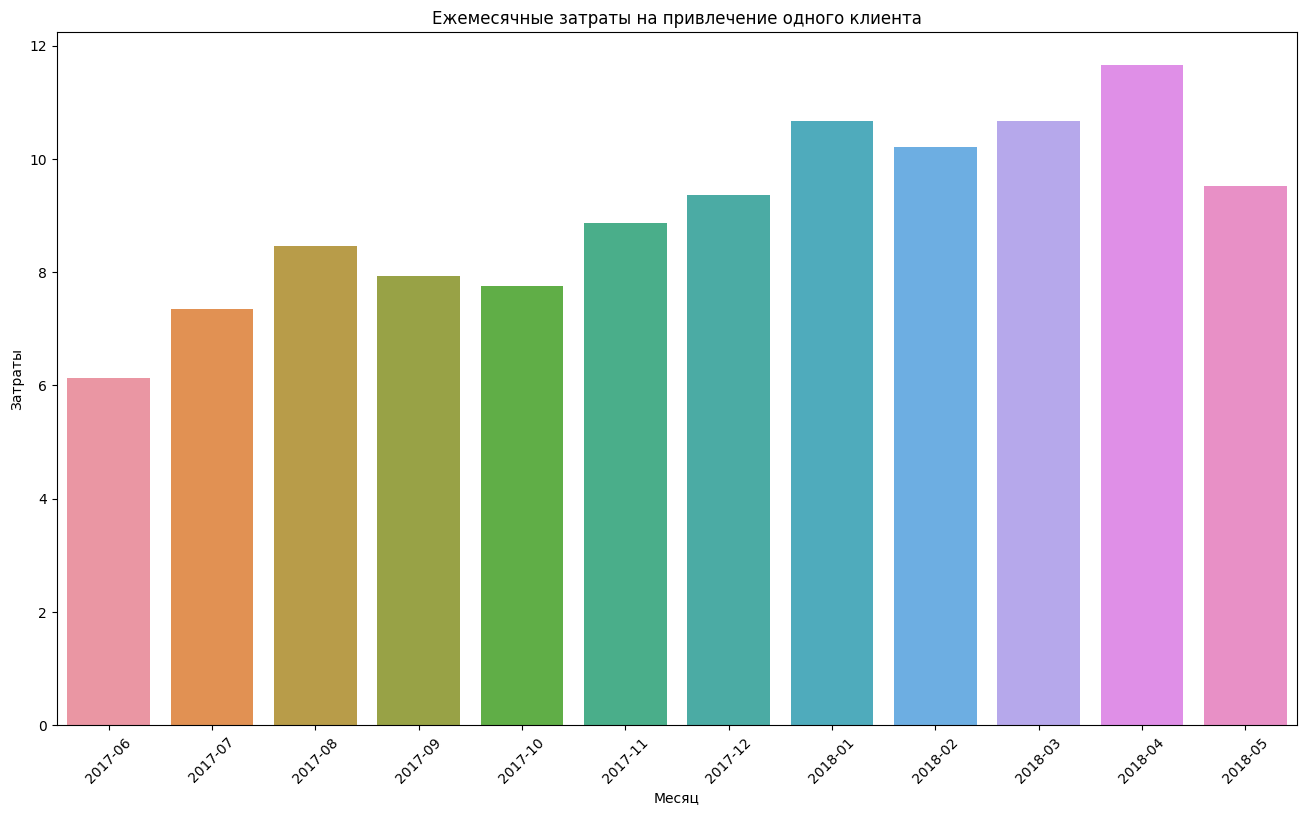

In [ ]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="first_visit_month", y="cac", data=cac_per_users)
ax.set_xticklabels(cac_per_users['first_visit_month'].dt.strftime('%Y-%m'),
                   rotation=45)
plt.title('Ежемесячные затраты на привлечение одного клиента')
ax.set_xlabel('Месяц')
ax.set_ylabel('Затраты')
plt.show()

In [ ]:
cac_per_source = cac_lst[1]['cac'].reset_index()
display(cac_per_source)

,source_id,cac
0,1,7.171449
1,2,12.176372
2,3,13.493901
3,4,5.930255
4,5,7.467378
5,7,0.000000
6,9,3.858318
7,10,4.064169


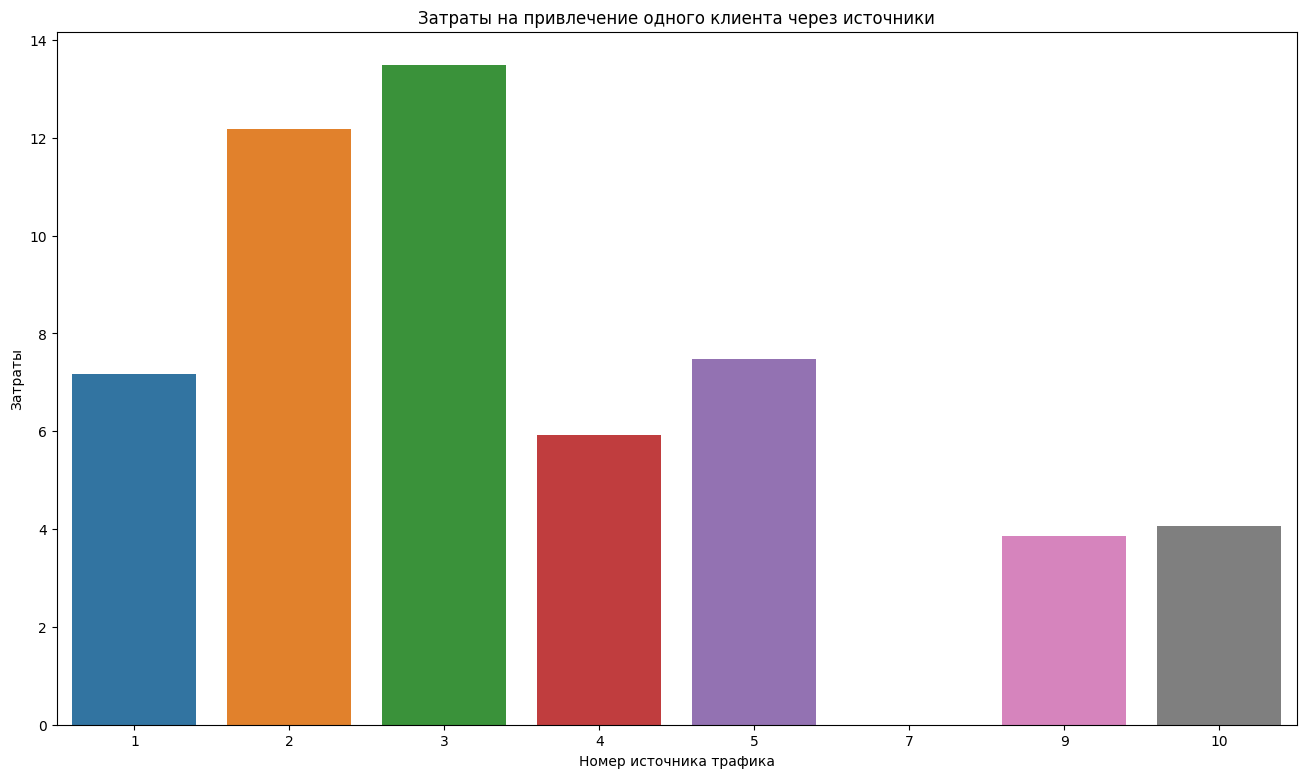

In [ ]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x = "source_id", y = "cac", data = cac_per_source)
plt.title('Затраты на привлечение одного клиента через источники')
ax.set_xlabel('Номер источника трафика')
ax.set_ylabel('Затраты')
plt.show()

#### ROI по когортам

ROI — коэффициент рентабельности инвестиций, который помогает рассчитать окупаемость вложений в проект. Позволяет определить эффективность потраченных средств.

$$
\text{roi} = \dfrac{ltv}{cac}
$$

По когортам у нас уже сформированы списки `ltv` и `cac`. В цикле для трех интересующих оснований когорт найдем соответствующее отношение.

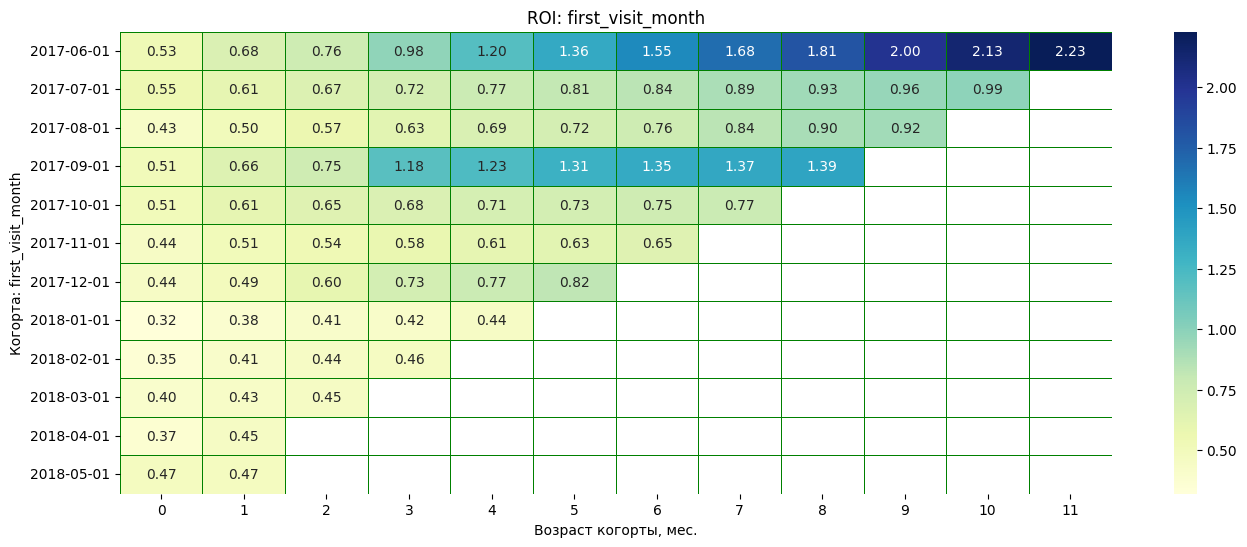

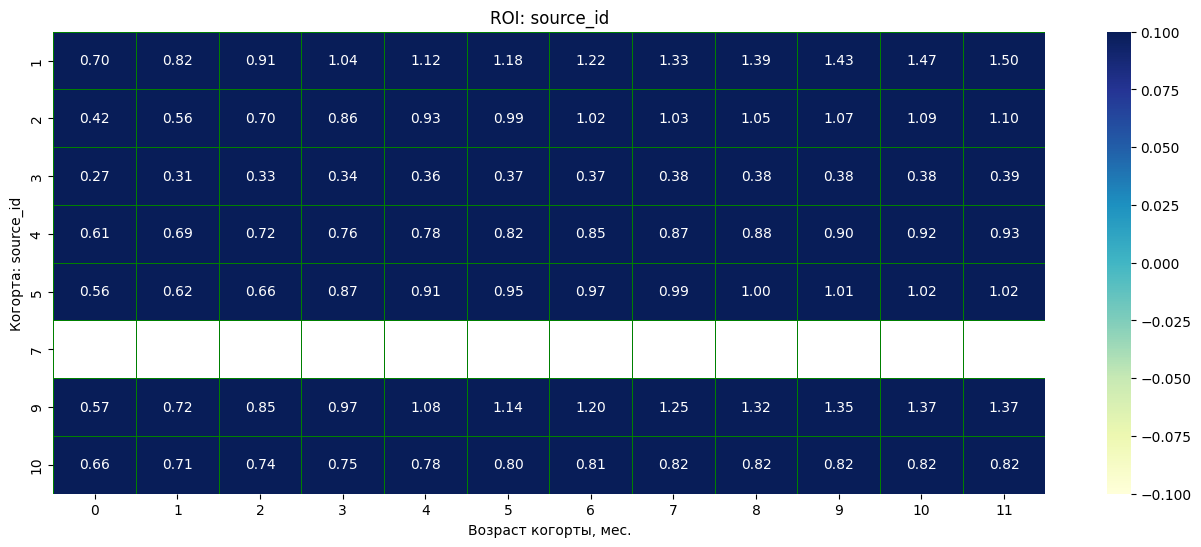

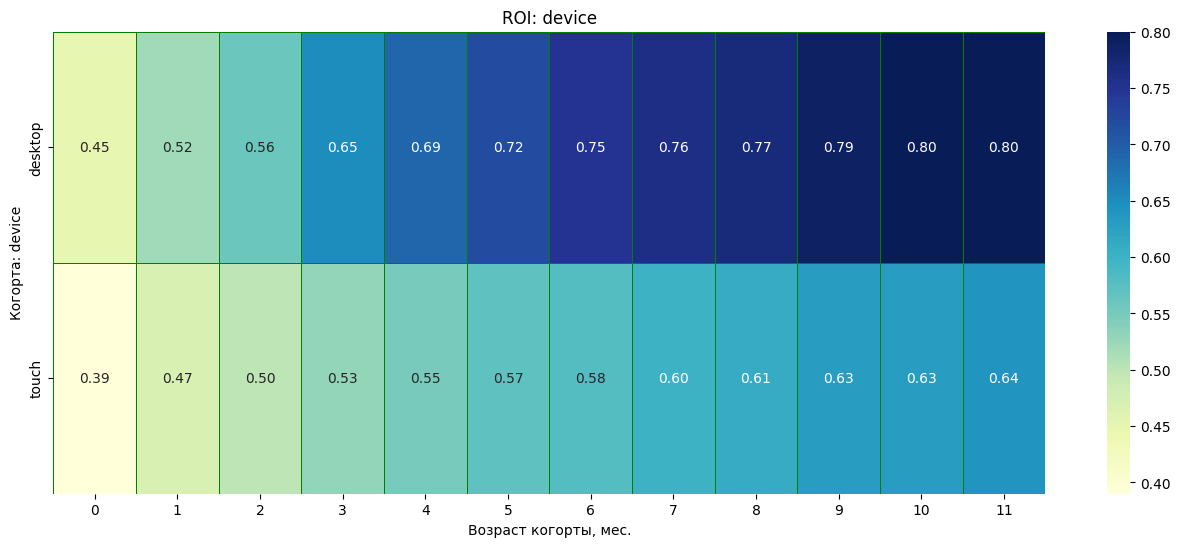

In [ ]:
for i, ltv in enumerate(ltv_lst):
    roi = ltv.join(cac_lst[i], how='left')
    roi['roi'] = roi['ltv'] / roi['cac']
    roi_pivot = roi.pivot_table(index=ltv.index.name, columns='buy_lifetime', values='roi', aggfunc='sum')
    roi_pivot = roi_pivot.cumsum(axis=1).round(2)
    plt.figure(figsize=(16, 6))
    plt.title('ROI: ' + ltv.index.name)
    ax = sns.heatmap(roi_pivot, annot=True, fmt=".2f", linecolor='green', linewidths=.5, cmap="YlGnBu")
    if i == 0:
        list_xticks = list(cohorts.index.strftime('%Y-%m-%d').values)
        ax.set_yticklabels(list_xticks)
    plt.xlabel('Возраст когорты, мес.')
    plt.ylabel('Когорта: '+ ltv.index.name)
